<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-CarlosAlbertoNievesPerez/blob/main/Actividad_Semanal_K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARLOS ALBERTO NIEVES PEREZ A01018796

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 6.9 MB/s 
     |████████████████████████████████| 1.0 MB 45.1 MB/s 
     |████████████████████████████████| 1.7 MB 41.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 61.8 MB/s 
     |████████████████████████████████| 6.3 MB 47.3 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=e8ff11bcd60bc9e48886fb56eb18968ed6f1e61e4666cc27a941f335437a6292
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=769ba97ed31d85f667bc9feacb9271552c0f32d8ba0037e143f51e5247b13dd7
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

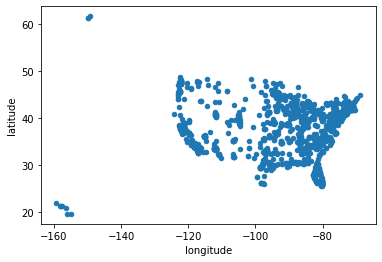

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

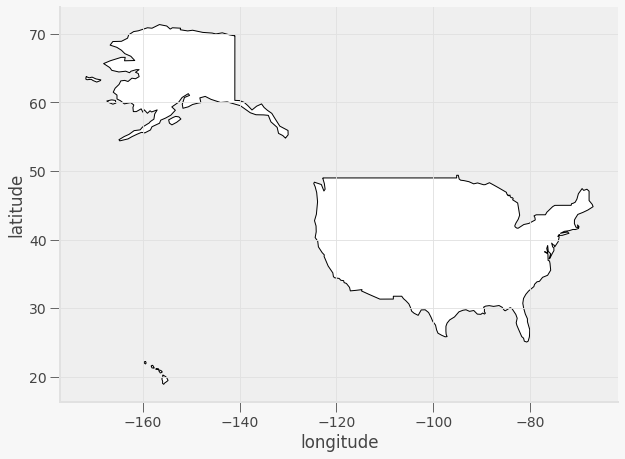

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

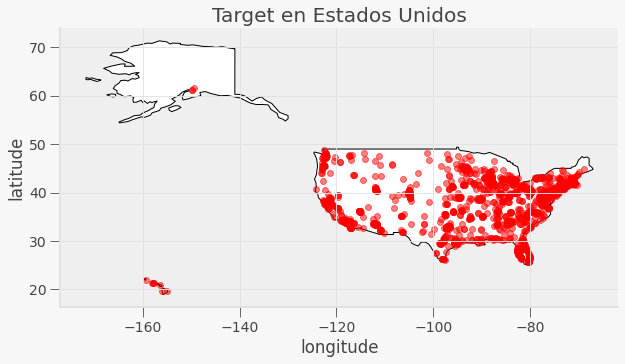

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [16]:
#tu codigo aquí
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [18]:
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from geopy.geocoders import Nominatim

sns.set(style="darkgrid", color_codes=True)
from sklearn.cluster import KMeans

In [19]:
X = df[['longitude', 'latitude']]

##ELBOW PLOT

Elbow plot: quantitative approach
The elbow plot is helpful when determining how many PCs we need to capture the majority of the variation in the data. The elbow plot visualizes the standard deviation of each PC. Where the elbow appears is usually the threshold for identifying the majority of the variation.


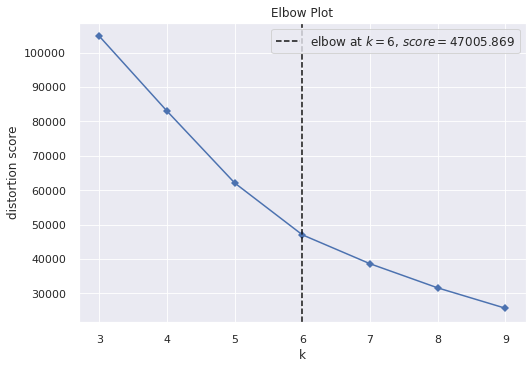

In [22]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(3,10),timings = False,locate_elbow=True)
visualizer.fit(X) #Fit the data to the visualizer
visualizer.title = 'Elbow Plot'
visualizer.show() #Finalize and render the figure

In [23]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

##LATITUDES Y LONGITUDES

In [24]:
centroids = kmeans.cluster_centers_
centroids

array([[ -75.65255351,   40.3424011 ],
       [-118.00942249,   37.75227889],
       [ -88.76508852,   41.77295911],
       [ -82.90148008,   31.14437802],
       [ -98.30400259,   33.91387391],
       [-155.22985317,   31.95466872]])

In [25]:
columnsLabel = X.columns
df_centroids = pd.DataFrame(centroids, columns=columnsLabel)
df_centroids

,longitude,latitude
0,-75.652554,40.342401
1,-118.009422,37.752279
2,-88.765089,41.772959
3,-82.901480,31.144378
4,-98.304003,33.913874
5,-155.229853,31.954669


##CIUDADES DE LOS ALMACENES

In [26]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.point import Point

geolocator = Nominatim(user_agent="geoapiExercises")

def reverse_geocoding(lat, lon):
    try:
        location = geolocator.reverse(Point(lat, lon))
        return location.raw.get('display_name')
    except:
        return None

df_centroids['Centroid City'] = np.vectorize(reverse_geocoding)(df_centroids['latitude'], df_centroids['longitude'])

df_centroids

,longitude,latitude,Centroid City
0,-75.652554,40.342401,"North Funk Road, Gabelsville, Colebrookdale To..."
1,-118.009422,37.752279,"Esmeralda County, Nevada, United States"
2,-88.765089,41.772959,"672, East Garfield Street, Waterman, Clinton T..."
3,-82.901480,31.144378,"Clinch County, Georgia, United States"
4,-98.304003,33.913874,"Clay County, Texas, United States"
5,-155.229853,31.954669,None


      **NONE** ES PORQUE ESTA EN MEDIO DE LA NADA

In [27]:
df

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)
...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429)
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960)
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680)
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202)


##¿a cuantas tiendas va surtir?

In [28]:
df['Centroid Number'] = y_pred
df_centroids['stores_counts'] = df['Centroid Number'].value_counts()
df_centroids

,longitude,latitude,Centroid City,stores_counts
0,-75.652554,40.342401,"North Funk Road, Gabelsville, Colebrookdale To...",484
1,-118.009422,37.752279,"Esmeralda County, Nevada, United States",359
2,-88.765089,41.772959,"672, East Garfield Street, Waterman, Clinton T...",436
3,-82.901480,31.144378,"Clinch County, Georgia, United States",272
4,-98.304003,33.913874,"Clay County, Texas, United States",277
5,-155.229853,31.954669,None,11


##¿sabes a que distancia estará?

In [29]:
df_centroids['LatLon_Together'] = [(x, y) for x, y in zip(df_centroids['longitude'], df_centroids['latitude'])]

In [30]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    '''
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    '''
    #convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# calculate distance between each centroid and its closest citv
for index, row in df.iterrows():
    cluster = df_centroids.iloc[row['Centroid Number']]
    long, lat = cluster ['LatLon_Together']
    df.loc[index, 'Distance to Centroid'] = haversine(row['longitude'], row['latitude'], long, lat)
    df.loc[index, 'Centroid City'] = cluster['Centroid City']

In [31]:
df[['name','Distance to Centroid','Centroid City','Centroid Number']].sort_values(by='Distance to Centroid', ascending=True).head()

,name,Distance to Centroid,Centroid City,Centroid Number
1409,West Pottsgrove Twp,8.128533,"North Funk Road, Gabelsville, Colebrookdale To...",0
1411,Exeter Township,17.927572,"North Funk Road, Gabelsville, Colebrookdale To...",0
1412,Royersford,19.629783,"North Funk Road, Gabelsville, Colebrookdale To...",0
554,DeKalb,20.601628,"672, East Garfield Street, Waterman, Clinton T...",2
1589,Wichita Falls,21.870148,"Clay County, Texas, United States",4


##¿qué librerías nos pueden ayudar a graficar este tipo de datos?

      -PyProj
      -RSGISLib
      -Geopandas

##¿Consideras importante que se grafique en un mapa?, ¿por qué?

      Si porque si unicamente visualizamos los datos en un df, podemos perder 
      de vista ciertos puntos tan claros como el punto del mapa que esta en 
      medio de la nada (outliers)

##Agrega Conclusiones

      Kmean es una herramienta bastante util que nos sirve para agrupar datos 
      en grupos especificos que tienen similitudes. Se podria decir que agrupa
      a traves de similitudes. 

      Tambien gracias a su division de grupos por similitudes nos puede ser mas
      facil encontrar outliers.